In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
train_path = '/home/b10173209/test.file/train.txt'
test_path = '/home/b10173209/test.file/test.txt'
val_path = '/home/b10173209/test.file/val.txt'

train_data = pd.read_csv(train_path, sep=';', names=['text', 'label'])
test_data = pd.read_csv(test_path, sep=';', names=['text', 'label'])
val_data = pd.read_csv(val_path, sep=';', names=['text', 'label'])

data = pd.concat([train_data, val_data], ignore_index=True)


In [3]:
# 定義參數網格
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# 建立空的 DataFrame 用於存放結果
results_df = pd.DataFrame(columns=['Fold', 'Val Accuracy', 'Val Precision', 'Val Recall', 'Val F1 Score',
                                   'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score',
                                   'Val Macro Precision', 'Val Macro Recall', 'Val Macro F1',
                                   'Test Macro Precision', 'Test Macro Recall', 'Test Macro F1',
                                   'C', 'kernel'])

# 定義五層分層交叉驗證
num_folds  = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

In [4]:
for kernel in param_grid['kernel']:
    for C_value in param_grid['C']:
        print(f"Running SVM with kernel: {kernel} and C: {C_value}")
        
        fold_results = []
        
        for fold, (train_index, val_index) in enumerate(skf.split(data['text'], data['label'])):
            print(f"折數: {fold + 1}/{num_folds}")
            
            # 分割資料
            X_train, X_val = data.iloc[train_index]['text'], data.iloc[val_index]['text']
            y_train, y_val = data.iloc[train_index]['label'], data.iloc[val_index]['label']
            
            # 特徵提取
            vectorizer = TfidfVectorizer(max_features=None)
            X_train_vec = vectorizer.fit_transform(X_train)
            X_val_vec = vectorizer.transform(X_val)
            X_test_vec = vectorizer.transform(test_data['text'])
            
            # 訓練模型
            svm_model = SVC(kernel=kernel, C=C_value, class_weight='balanced', random_state=42)
            svm_model.fit(X_train_vec, y_train)
            
            # 驗證集預測
            val_preds = svm_model.predict(X_val_vec)
            val_acc = accuracy_score(y_val, val_preds)
            val_prec = precision_score(y_val, val_preds, average='weighted')
            val_rec = recall_score(y_val, val_preds, average='weighted')
            val_f1 = f1_score(y_val, val_preds, average='weighted')
            val_macro_prec = precision_score(y_val, val_preds, average='macro')
            val_macro_rec = recall_score(y_val, val_preds, average='macro')
            val_macro_f1 = f1_score(y_val, val_preds, average='macro')
            
            # 測試集預測
            test_preds = svm_model.predict(X_test_vec)
            test_acc = accuracy_score(test_data['label'], test_preds)
            test_prec = precision_score(test_data['label'], test_preds, average='weighted')
            test_rec = recall_score(test_data['label'], test_preds, average='weighted')
            test_f1 = f1_score(test_data['label'], test_preds, average='weighted')
            test_macro_prec = precision_score(test_data['label'], test_preds, average='macro')
            test_macro_rec = recall_score(test_data['label'], test_preds, average='macro')
            test_macro_f1 = f1_score(test_data['label'], test_preds, average='macro')

            print(f"val_macro_f1: {val_macro_f1}, test_macro_f1:{test_macro_f1}")
            
            # 保存結果
            fold_results.append({
                'Fold': fold + 1,
                'Val Accuracy': val_acc,
                'Val Precision': val_prec,
                'Val Recall': val_rec,
                'Val F1 Score': val_f1,
                'Test Accuracy': test_acc,
                'Test Precision': test_prec,
                'Test Recall': test_rec,
                'Test F1 Score': test_f1,
                'Val Macro Precision': val_macro_prec,
                'Val Macro Recall': val_macro_rec,
                'Val Macro F1': val_macro_f1,
                'Test Macro Precision': test_macro_prec,
                'Test Macro Recall': test_macro_rec,
                'Test Macro F1': test_macro_f1,
                'C': C_value,
                'kernel': kernel
            })
        
        results_df = pd.concat([results_df, pd.DataFrame(fold_results)], ignore_index=True)

# 保存結果到 Excel
results_df.to_excel('/home/b10173209/test.file/SS/integrate_results.xlsx', index=False)
print("Results saved to integrate_results.xlsx")

Running SVM with kernel: linear and C: 0.1
折數: 1/5
val_macro_f1: 0.778251693188751, test_macro_f1:0.7546111841103139
折數: 2/5
val_macro_f1: 0.7587375472713624, test_macro_f1:0.7464912331042467
折數: 3/5
val_macro_f1: 0.760289727012258, test_macro_f1:0.7487528825705289
折數: 4/5
val_macro_f1: 0.7592027220626094, test_macro_f1:0.749145407213092
折數: 5/5
val_macro_f1: 0.7668076042884192, test_macro_f1:0.7450113414062084
Running SVM with kernel: linear and C: 1
折數: 1/5
val_macro_f1: 0.8495037889456695, test_macro_f1:0.8424141163963359
折數: 2/5
val_macro_f1: 0.840117412944879, test_macro_f1:0.8471737092673647
折數: 3/5
val_macro_f1: 0.839475057905223, test_macro_f1:0.8414031215161488
折數: 4/5
val_macro_f1: 0.8515953442664447, test_macro_f1:0.8321132716423478
折數: 5/5
val_macro_f1: 0.8508115711870793, test_macro_f1:0.8356515428481465
Running SVM with kernel: linear and C: 10
折數: 1/5
val_macro_f1: 0.8355118980452904, test_macro_f1:0.8243081077132864
折數: 2/5
val_macro_f1: 0.8253383767772089, test_macro_f

/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classifica

val_macro_f1: 0.08478088284910278, test_macro_f1:0.07509370557063462
折數: 2/5


/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classifica

val_macro_f1: 0.14355040714610381, test_macro_f1:0.1475311970418952
折數: 3/5


/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classifica

val_macro_f1: 0.09148587139853515, test_macro_f1:0.08596165739022882
折數: 4/5


/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classifica

val_macro_f1: 0.08400858785234434, test_macro_f1:0.08586983419945558
折數: 5/5


/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b10173209/venv/lib/python3.8/site-packages/sklearn/metrics/_classifica

val_macro_f1: 0.09153769153769153, test_macro_f1:0.08596165739022882
Running SVM with kernel: poly and C: 1
折數: 1/5
val_macro_f1: 0.3506277336622113, test_macro_f1:0.3725511541927744
折數: 2/5
val_macro_f1: 0.3642083627973351, test_macro_f1:0.36286677933700645
折數: 3/5
val_macro_f1: 0.3567251233620674, test_macro_f1:0.35163629179409783
折數: 4/5
val_macro_f1: 0.3525269062639032, test_macro_f1:0.36112438809945896
折數: 5/5
val_macro_f1: 0.3463823459165784, test_macro_f1:0.34862717811347127
Running SVM with kernel: poly and C: 10
折數: 1/5
val_macro_f1: 0.3935361774282269, test_macro_f1:0.4095729570035039
折數: 2/5
val_macro_f1: 0.40711943587969857, test_macro_f1:0.40584030089968054
折數: 3/5
val_macro_f1: 0.3993180828324352, test_macro_f1:0.393202644867047
折數: 4/5
val_macro_f1: 0.39271745373481687, test_macro_f1:0.4020273004624293
折數: 5/5
val_macro_f1: 0.39205768324825735, test_macro_f1:0.39457383346437297
Running SVM with kernel: poly and C: 100
折數: 1/5
val_macro_f1: 0.3935361774282269, test_macro_

In [9]:
results_df

,Fold,Val Accuracy,Val Precision,Val Recall,Val F1 Score,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Val Macro Precision,Val Macro Recall,Val Macro F1,Test Macro Precision,Test Macro Recall,Test Macro F1,C,kernel
0,1,0.788333,0.800607,0.788333,0.788055,0.7740,0.793366,0.7740,0.775609,0.771826,0.802310,0.778252,0.746668,0.790697,0.754611,0.1,linear
1,2,0.773333,0.787759,0.773333,0.774681,0.7720,0.788344,0.7720,0.773705,0.755404,0.779119,0.758738,0.740834,0.775147,0.746491,0.1,linear
2,3,0.775000,0.788429,0.775000,0.775331,0.7725,0.790889,0.7725,0.773483,0.761452,0.777126,0.760290,0.744901,0.778067,0.748753,0.1,linear
3,4,0.772222,0.787160,0.772222,0.772276,0.7745,0.793137,0.7745,0.776437,0.757353,0.785467,0.759203,0.744435,0.780934,0.749145,0.1,linear
4,5,0.778611,0.792281,0.778611,0.779501,0.7725,0.792503,0.7725,0.774492,0.764776,0.785517,0.766808,0.739010,0.776995,0.745011,0.1,linear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.754444,0.762150,0.754444,0.753618,0.7650,0.771324,0.7650,0.764485,0.728807,0.690223,0.700838,0.718637,0.695315,0.701014,1000.0,sigmoid
96,2,0.764722,0.768755,0.764722,0.762598,0.7760,0.783391,0.7760,0.775653,0.740491,0.688804,0.703321,0.747955,0.718083,0.726586,1000.0,sigmoid
97,3,0.756389,0.761222,0.756389,0.754780,0.7445,0.751270,0.7445,0.743750,0.730772,0.692946,0.702968,0.713810,0.681853,0.690423,1000.0,sigmoid
98,4,0.752778,0.757891,0.752778,0.752261,0.7635,0.765524,0.7635,0.762722,0.720110,0.696131,0.703224,0.718417,0.697253,0.705242,1000.0,sigmoid


In [10]:
import matplotlib.pyplot as plt 
validation_results = (
    results_df.groupby(['C', 'kernel'])
    ['Val Macro F1']
    .mean()
    .reset_index()
    .sort_values(by='Val Macro F1', ascending=False)
)

best_params = validation_results.iloc[0]
best_params

C                    1.0
kernel            linear
Val Macro F1    0.846301
Name: 4, dtype: object

In [11]:
validation_results

,C,kernel,Val Macro F1
4,1.0,linear,0.846301
7,1.0,sigmoid,0.846166
8,10.0,linear,0.827042
6,1.0,rbf,0.816117
12,100.0,linear,0.814764
10,10.0,rbf,0.810502
18,1000.0,rbf,0.810426
14,100.0,rbf,0.810426
16,1000.0,linear,0.807142
11,10.0,sigmoid,0.798051


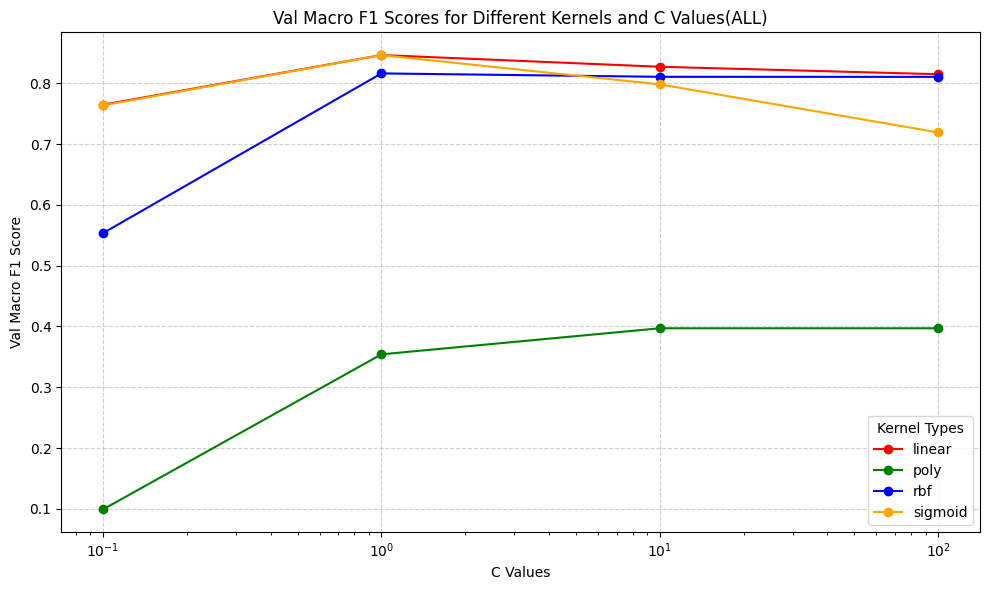

In [13]:
filtered_data = validation_results[validation_results['C'].isin([0.1, 1, 10, 100])]
pivot_data = filtered_data.pivot(index='C', columns='kernel', values='Val Macro F1')

plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'orange']

for idx, kernel in enumerate(pivot_data.columns):
    plt.plot(pivot_data.index, pivot_data[kernel], marker='o', label=kernel, color=colors[idx])


plt.title("Val Macro F1 Scores for Different Kernels and C Values(ALL)")
plt.xlabel("C Values")
plt.ylabel("Val Macro F1 Score")
plt.xscale('log')  # Log scale for C values
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Kernel Types', loc='best')
plt.tight_layout()
plt.savefig('ALL_SS.png', dpi=300, bbox_inches='tight')
plt.show()